Import python libraries required for the script

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from numpy.polynomial import polynomial as npp

warnings.filterwarnings('ignore')

%matplotlib inline

Read the CSV files

In [2]:
df = pd.read_csv('VMI_Data_BP2_V02_AK6_090118_032619_mod01.csv')

# Sampling after cleanup
# df_sample = df.sample(10000)

Check the columns in the data

In [3]:
print(df.columns)

Index(['MACHINE_ID', 'DATE_TIME_STAMP', 'GT_BARCODE', 'TIRE_TYPE',
       'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP2_S8_L',
       'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
       'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R',
       'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 'BP2_S8_R', 'BP2_PART',
       'BP2_BARCODE', 'PART_LENGTH', 'BP2_BUILD_DATE', 'BP2_MACHINEID',
       'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
       'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
       'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
       'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
       'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5

In [4]:
# df = df.drop('SPLICE_LIMIT_LOW',1)
# df = df.drop('SPLICE_LIMIT_HIGH',1)
# df = df.drop('ID',1)

Deleting unwanted columns to conserve memory used for the script

In [5]:
df = df.drop('MACHINE_ID',1)
# df = df.drop('DATE_TIME_STAMP',1)
df = df.drop('GT_BARCODE',1)
df = df.drop('TIRE_TYPE',1)
df = df.drop('BP2_PART',1)
# df = df.drop('BP2_BARCODE',1)
df = df.drop('BP2_BUILD_DATE',1)
# df = df.drop('BP2_MACHINEID',1)

In [6]:
df.dtypes

DATE_TIME_STAMP        object
CUT_LENGTH            float64
CONV_WAIT_TIME        float64
LFT_SPLICE_LENGTH     float64
MID_SPLICE_LENGTH     float64
RHT_SPLICE_LENGTH     float64
SPLICE_OK               int64
BP2_S8_L              float64
BP2_S7_L              float64
BP2_S6_L              float64
BP2_S5_L              float64
BP2_S4_L              float64
BP2_S3_L              float64
BP2_S2_L              float64
BP2_S1_ML             float64
BP2_S1_MR             float64
BP2_S2_R              float64
BP2_S3_R              float64
BP2_S4_R              float64
BP2_S5_R              float64
BP2_S6_R              float64
BP2_S7_R              float64
BP2_S8_R              float64
BP2_BARCODE            object
PART_LENGTH             int64
BP2_MACHINEID          object
LFT_SPLICE_DELTA      float64
LFT_SPLICE_PREV       float64
LFT_SPLICE_MA5        float64
LFT_SPLICE_MA10       float64
LFT_SPLICE_MA20       float64
LFT_SPLICE_MA50       float64
LFT_SPLICE_SLOPE5     float64
LFT_SPLICE

In [7]:
df.describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,SPLICE_OK,BP2_S8_L,BP2_S7_L,BP2_S6_L,BP2_S5_L,...,RHT_SPLICE_MA20,RHT_SPLICE_MA50,RHT_SPLICE_SLOPE5,RHT_SPLICE_SLOPE10,RHT_SPLICE_SLOPE20,RHT_SPLICE_SLOPE50,LFT_SPLICE_GRADE,MID_SPLICE_GRADE,RHT_SPLICE_GRADE,SPLICE_GRADE
count,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,...,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000
mean,1684.007223,78.771531,7.183006,6.766718,7.241695,0.860684,0.000082,0.000082,0.000082,0.003911,...,-0.008440,-0.008782,0.000028,0.000016,0.000014,0.000024,0.937967,0.888052,0.943947,0.826625
std,212.881855,217.580810,2.066687,1.687490,2.040821,0.346277,0.000905,0.000905,0.000905,0.015851,...,1.183461,0.996008,0.539785,0.225192,0.103757,0.039659,0.241216,0.315303,0.230026,0.378573
min,0.000000,0.000000,-44.507580,-42.932030,-48.073080,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.434843,-4.520160,-11.674499,-4.108142,-1.348050,-0.227405,0.000000,0.000000,0.000000,0.000000
25%,1709.547000,26.787000,5.968244,5.756464,6.069771,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.790307,-0.662134,-0.301845,-0.121250,-0.057782,-0.024436,1.000000,1.000000,1.000000,1.000000
50%,1710.990000,32.579000,7.223798,6.802274,7.324743,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.018267,-0.013623,-0.004087,0.001049,0.001752,0.000510,1.000000,1.000000,1.000000,1.000000
75%,1712.238000,60.261750,8.466334,7.842848,8.484006,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.761537,0.637420,0.292129,0.121875,0.060005,0.024937,1.000000,1.000000,1.000000,1.000000
max,1750.327000,10069.590000,45.129540,42.304540,36.336150,1.000000,0.010000,0.010000,0.010000,0.140000,...,8.879561,5.450212,11.404798,4.366500,1.136231,0.247065,1.000000,1.000000,1.000000,1.000000


Check missing data

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
df = df.dropna()


                  Total  Percent
SPLICE_GRADE          0      0.0
RHT_SPLICE_GRADE      0      0.0
LFT_SPLICE_PREV       0      0.0
LFT_SPLICE_DELTA      0      0.0
BP2_MACHINEID         0      0.0
PART_LENGTH           0      0.0
BP2_BARCODE           0      0.0
BP2_S8_R              0      0.0
BP2_S7_R              0      0.0
BP2_S6_R              0      0.0
BP2_S5_R              0      0.0
BP2_S4_R              0      0.0
BP2_S3_R              0      0.0
BP2_S2_R              0      0.0
BP2_S1_MR             0      0.0
BP2_S1_ML             0      0.0
BP2_S2_L              0      0.0
BP2_S3_L              0      0.0
BP2_S4_L              0      0.0
BP2_S5_L              0      0.0


In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))


                  Total  Percent
SPLICE_GRADE          0      0.0
RHT_SPLICE_GRADE      0      0.0
LFT_SPLICE_PREV       0      0.0
LFT_SPLICE_DELTA      0      0.0
BP2_MACHINEID         0      0.0
PART_LENGTH           0      0.0
BP2_BARCODE           0      0.0
BP2_S8_R              0      0.0
BP2_S7_R              0      0.0
BP2_S6_R              0      0.0
BP2_S5_R              0      0.0
BP2_S4_R              0      0.0
BP2_S3_R              0      0.0
BP2_S2_R              0      0.0
BP2_S1_MR             0      0.0
BP2_S1_ML             0      0.0
BP2_S2_L              0      0.0
BP2_S3_L              0      0.0
BP2_S4_L              0      0.0
BP2_S5_L              0      0.0


In [10]:
# # deleting points
# df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# #df = df.drop(df[df['CUT_LENGTH'] > 1720].index)
# df = df.drop(df[df['CUT_LENGTH'] < 1680].index)

# df.sort_index(inplace=True)

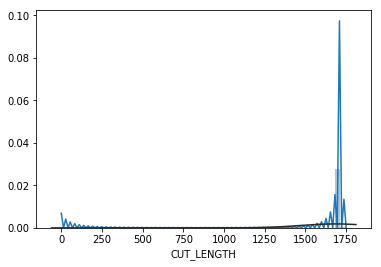

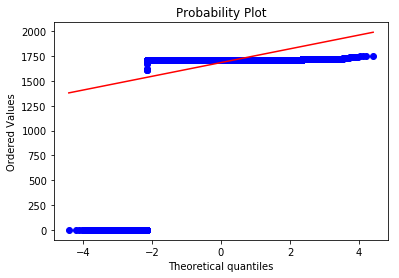

In [11]:
#histogram and normal probability plot
sns.distplot(df['CUT_LENGTH'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CUT_LENGTH'], plot=plt)

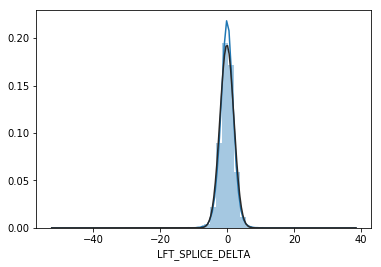

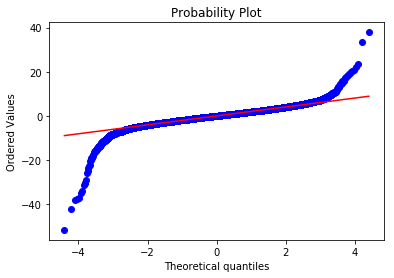

In [12]:
#histogram and normal probability plot
sns.distplot(df['LFT_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['LFT_SPLICE_DELTA'], plot=plt)

In [13]:
# # deleting points
# df.sort_values(by = 'MID_SPLICE_DELTA', ascending = False)[:2]
# df = df.drop(df[df['MID_SPLICE_DELTA'] < -20].index)

# df.sort_index(inplace=True)

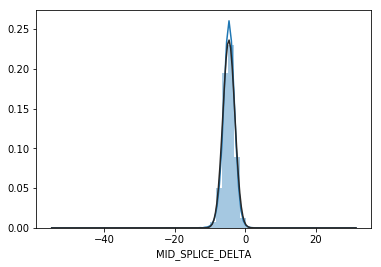

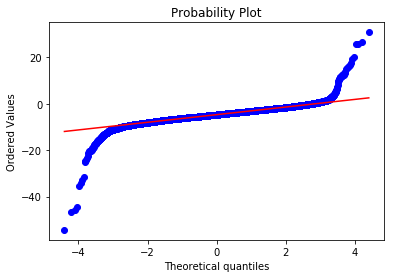

In [14]:
#histogram and normal probability plot
sns.distplot(df['MID_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['MID_SPLICE_DELTA'], plot=plt)

In [15]:
# # deleting points
# df.sort_values(by = 'RHT_SPLICE_DELTA', ascending = False)[:2]
# df = df.drop(df[df['RHT_SPLICE_DELTA'] < -20].index)

# df.sort_index(inplace=True)

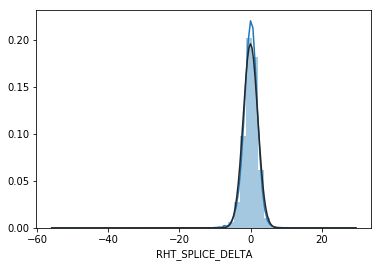

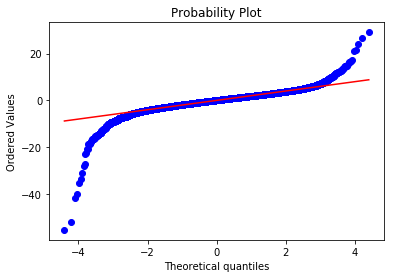

In [16]:
#histogram and normal probability plot
sns.distplot(df['RHT_SPLICE_DELTA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['RHT_SPLICE_DELTA'], plot=plt)

In [17]:
# # # deleting points
# # df.sort_values(by = 'CONV_WAIT_TIME', ascending = False)[:2]
# # df = df.drop(df[df['CONV_WAIT_TIME'] > 1000].index)

# # df.sort_index(inplace=True)

# df['CONV_WAIT_TIME'] = df['CONV_WAIT_TIME'] + 1

# # applying log transformation
# df['CONV_WAIT_TIME'] = np.log(df['CONV_WAIT_TIME'])

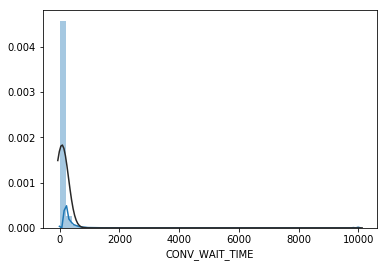

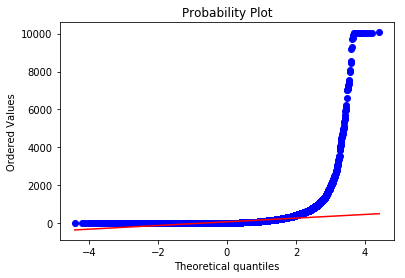

In [18]:
#histogram and normal probability plot
sns.distplot(df['CONV_WAIT_TIME'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CONV_WAIT_TIME'], plot=plt)

In [19]:
df_sample = df.sample(10000)

In [20]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [21]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [22]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [23]:
# todo
a = outliers_iqr(df['CUT_LENGTH'])
a


(array([    74,     76,    146, ..., 132014, 132027, 132087], dtype=int64),)

In [24]:
def myZscore(x):
    if not np.issubdtype(x.dtype, np.number):
        return 5    
    print(x.dtype)
    return np.abs(x - x.mean()) / x.std()


In [25]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# print(numeric_cols)
# df_temp = df[np.abs(stats.zscore(df) < 4).all(axis=1)]
# df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# df_temp = df[df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
# print(df_temp.shape)

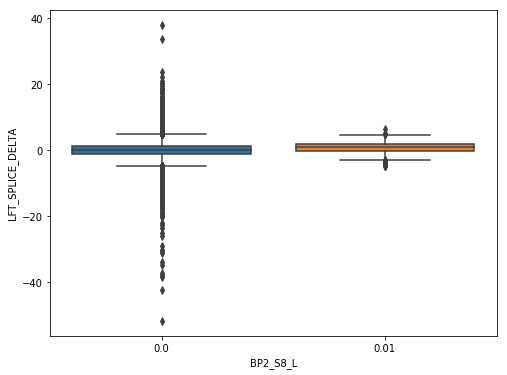

In [26]:
#box plot
var = 'BP2_S8_L'
data = pd.concat([df['LFT_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LFT_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

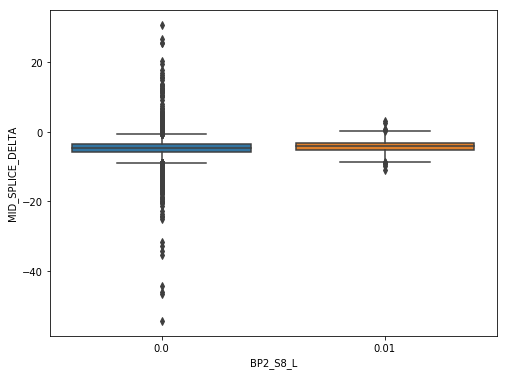

In [27]:
#box plot
var = 'BP2_S8_L'
data = pd.concat([df['MID_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MID_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

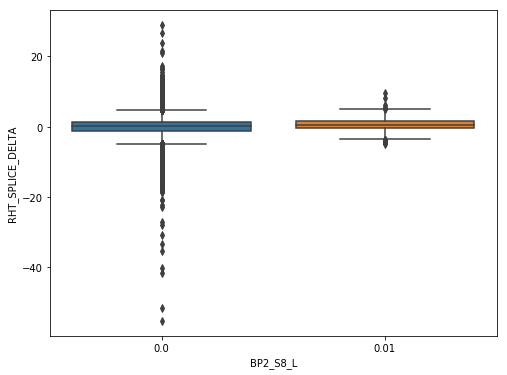

In [28]:
#box plot
var = 'BP2_S8_L'
data = pd.concat([df['RHT_SPLICE_DELTA'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="RHT_SPLICE_DELTA", data=data)
# fig.axis(ymin=10, ymax=25);

In [29]:
#skewness and kurtosis
print("Skewness: %f" % df['CUT_LENGTH'].skew())
print("Kurtosis: %f" % df['CUT_LENGTH'].kurt())

Skewness: -7.783538
Kurtosis: 58.589886


In [30]:
#skewness and kurtosis
print("Skewness: %f" % df['CONV_WAIT_TIME'].skew())
print("Kurtosis: %f" % df['CONV_WAIT_TIME'].kurt())

Skewness: 24.340648
Kurtosis: 903.309985


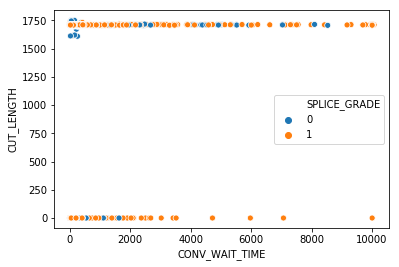

In [31]:
#scatter plot
ax = sns.scatterplot(x="CONV_WAIT_TIME", y="CUT_LENGTH", hue="SPLICE_GRADE", data=df)

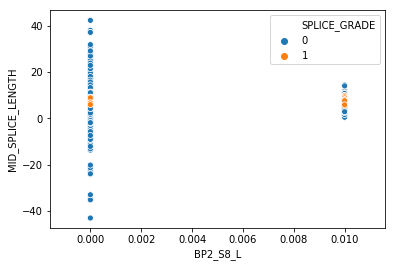

In [32]:
#scatter plot
ax = sns.scatterplot(x="BP2_S8_L", y="MID_SPLICE_LENGTH", hue="SPLICE_GRADE", data=df)

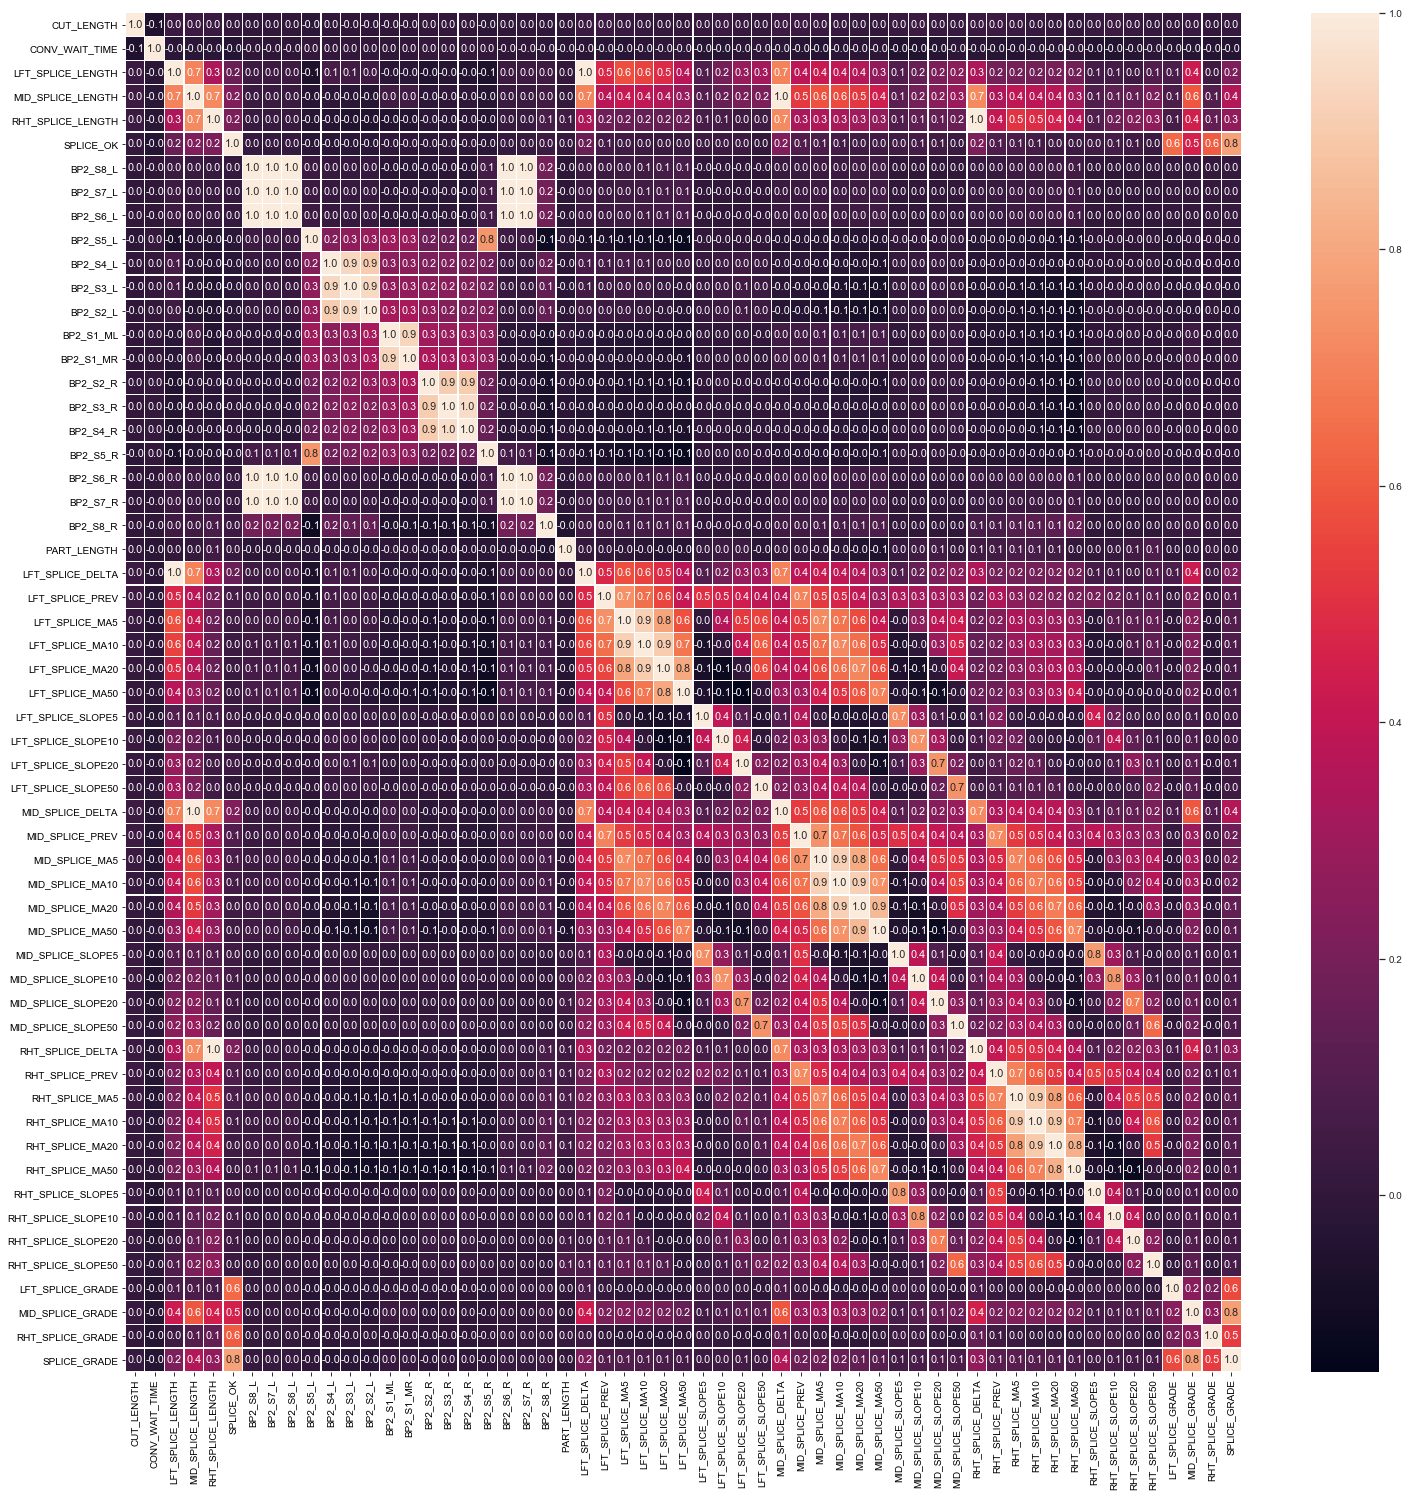

In [33]:
#correlation map
corrmat = df.corr()
f,ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, annot=True, linewidths=.2, fmt= '.1f',ax=ax)
plt.show()


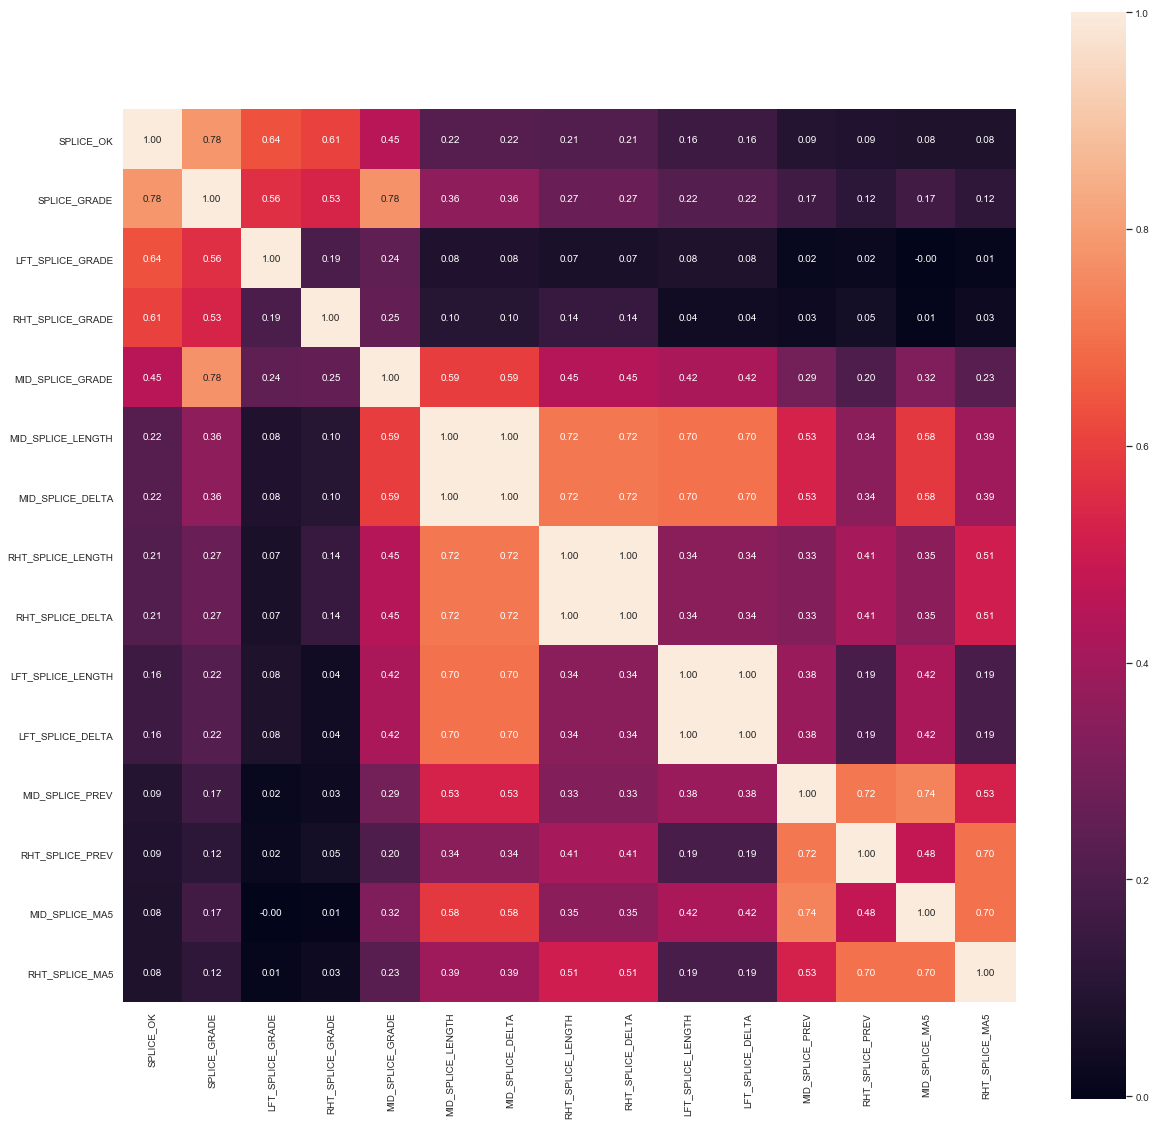

In [34]:
# correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SPLICE_OK')['SPLICE_OK'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.9)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
   
data = []
for f in df.columns:
    # Defining the role
    if f == 'SPLICE_OK':
        role = 'target'
    elif f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
               'SPLICE_LIMIT_HIGH','BP2_PART','BP2_BARCODE', 'BP2_BUILD_DATE','BP2_MACHINEID']:
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if f == 'SPLICE_OK':
        opType = 'binary'
    elif f == 'DATE_TIME_STAMP':
        opType = 'timestamp'
    elif df[f].dtype == object:
        opType = 'nominal'
    elif df[f].dtype == bool:
        opType = 'binary'
    elif df[f].dtype == int:
        opType = 'interval'
    elif df[f].dtype == float:
        opType = 'interval'
    else :
        opType = 'interval'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f in ['ID','MACHINE_ID','DATE_TIME_STAMP','GT_BARCODE','TIRE_TYPE','SPLICE_LIMIT_LOW',
               'SPLICE_LIMIT_HIGH','BP2_PART','BP2_BARCODE', 'BP2_BUILD_DATE','BP2_MACHINEID']:
        keep = False
    
    # Defining the data type 
    dtype = df[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': opType,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [36]:
meta

,role,level,keep,dtype
varname,,,,
DATE_TIME_STAMP,id,timestamp,False,object
CUT_LENGTH,input,interval,True,float64
CONV_WAIT_TIME,input,interval,True,float64
LFT_SPLICE_LENGTH,input,interval,True,float64
MID_SPLICE_LENGTH,input,interval,True,float64
RHT_SPLICE_LENGTH,input,interval,True,float64
SPLICE_OK,target,binary,True,int64
BP2_S8_L,input,interval,True,float64
BP2_S7_L,input,interval,True,float64


In [37]:
meta[(meta.level == 'interval') & (meta.keep)].index

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'BP2_S8_L', 'BP2_S7_L',
       'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L', 'BP2_S1_ML',
       'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R',
       'BP2_S7_R', 'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_DELTA',
       'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10',
       'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5',
       'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50',
       'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5',
       'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50',
       'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
       'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLIC

In [38]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,2
1,id,timestamp,1
2,input,interval,56
3,target,binary,1


In [39]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
df[v].describe()

,CUT_LENGTH,CONV_WAIT_TIME,LFT_SPLICE_LENGTH,MID_SPLICE_LENGTH,RHT_SPLICE_LENGTH,BP2_S8_L,BP2_S7_L,BP2_S6_L,BP2_S5_L,BP2_S4_L,...,RHT_SPLICE_MA20,RHT_SPLICE_MA50,RHT_SPLICE_SLOPE5,RHT_SPLICE_SLOPE10,RHT_SPLICE_SLOPE20,RHT_SPLICE_SLOPE50,LFT_SPLICE_GRADE,MID_SPLICE_GRADE,RHT_SPLICE_GRADE,SPLICE_GRADE
count,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,...,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000,132124.000000
mean,1684.007223,78.771531,7.183006,6.766718,7.241695,0.000082,0.000082,0.000082,0.003911,0.039341,...,-0.008440,-0.008782,0.000028,0.000016,0.000014,0.000024,0.937967,0.888052,0.943947,0.826625
std,212.881855,217.580810,2.066687,1.687490,2.040821,0.000905,0.000905,0.000905,0.015851,0.036415,...,1.183461,0.996008,0.539785,0.225192,0.103757,0.039659,0.241216,0.315303,0.230026,0.378573
min,0.000000,0.000000,-44.507580,-42.932030,-48.073080,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.434843,-4.520160,-11.674499,-4.108142,-1.348050,-0.227405,0.000000,0.000000,0.000000,0.000000
25%,1709.547000,26.787000,5.968244,5.756464,6.069771,0.000000,0.000000,0.000000,0.000000,0.010000,...,-0.790307,-0.662134,-0.301845,-0.121250,-0.057782,-0.024436,1.000000,1.000000,1.000000,1.000000
50%,1710.990000,32.579000,7.223798,6.802274,7.324743,0.000000,0.000000,0.000000,0.000000,0.030000,...,-0.018267,-0.013623,-0.004087,0.001049,0.001752,0.000510,1.000000,1.000000,1.000000,1.000000
75%,1712.238000,60.261750,8.466334,7.842848,8.484006,0.000000,0.000000,0.000000,0.000000,0.060000,...,0.761537,0.637420,0.292129,0.121875,0.060005,0.024937,1.000000,1.000000,1.000000,1.000000
max,1750.327000,10069.590000,45.129540,42.304540,36.336150,0.010000,0.010000,0.010000,0.140000,0.300000,...,8.879561,5.450212,11.404798,4.366500,1.136231,0.247065,1.000000,1.000000,1.000000,1.000000


In [40]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
df[v].describe()

,SPLICE_OK
count,132124.000000
mean,0.860684
std,0.346277
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [41]:
# #standardizing data
# cut_length_scaled = StandardScaler().fit_transform(df['CUT_LENGTH'][:,np.newaxis]);
# low_range = cut_length_scaled[cut_length_scaled[:,0].argsort()][:10]
# high_range= cut_length_scaled[cut_length_scaled[:,0].argsort()][-10:]
# print('outer range (low) of the distribution:')
# print(low_range)
# print('\nouter range (high) of the distribution:')
# print(high_range)

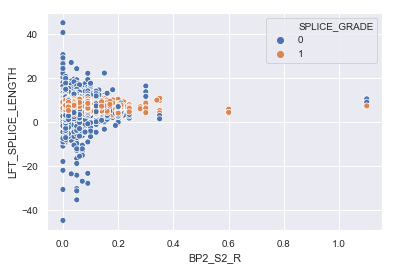

In [42]:
#bivariate analysis
ax = sns.scatterplot(x="BP2_S2_R", y="LFT_SPLICE_LENGTH", hue="SPLICE_GRADE", data=df)


In [43]:
# # deleting points
# df.sort_values(by = 'CUT_LENGTH', ascending = False)[:2]
# #df = df.drop(df[df['CUT_LENGTH'] > 1720].index)
# #df = df.drop(df[df['CUT_LENGTH'] < 1690].index)

# df.sort_index(inplace=True)

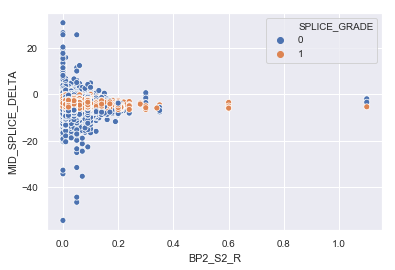

In [44]:
#bivariate analysis
ax = sns.scatterplot(x="BP2_S2_R", y="MID_SPLICE_DELTA", hue="SPLICE_GRADE", data=df)

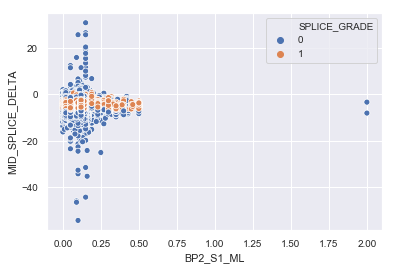

In [45]:
#bivariate analysis saleprice/grlivarea
ax = sns.scatterplot(x="BP2_S1_ML", y="MID_SPLICE_DELTA", hue="SPLICE_GRADE", data=df)

In [46]:
#applying log transformation
# df['CUT_LENGTH_LOG'] = np.log(df['CUT_LENGTH'])

In [47]:
#transformed histogram and normal probability plot
# sns.distplot(df['CUT_LENGTH_LOG'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df['CUT_LENGTH_LOG'], plot=plt)

In [48]:
# df = df.drop('CUT_LENGTH_LOG',1)

In [49]:
#from bokeh.charts import HeatMap, bins, output_file, show, vplot
#hm1 = HeatMap(autompg, x=bins('mpg'), y=bins('displ'))

df.columns

Index(['DATE_TIME_STAMP', 'CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
       'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 'SPLICE_OK', 'BP2_S8_L',
       'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
       'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R',
       'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 'BP2_S8_R', 'BP2_BARCODE',
       'PART_LENGTH', 'BP2_MACHINEID', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA',
       'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10',
       'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5',
       'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50',
       'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5',
       'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50',
       'RHT_SPLICE

In [50]:
# using df_sample dataset (10000 rows only)

# cols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH',
#        'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', #'SPLICE_OK', 
#         'PA_S8_L', 'PA_S7_L', 'PA_S6_L',
#        'PA_S5_L', 'PA_S4_L', 'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR',
#        'PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R',
#        'PA_S8_R', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5',
#        'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
#        'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
#        'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV',
#        'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
#        'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
#        'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA',
#        'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
#        'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5',
#        'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50']
#sns.pairplot(df_pa[cols])

# ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
# xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', #'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH','PA_S8_L', 'PA_S7_L', 'PA_S6_L', 'PA_S5_L', 'PA_S4_L', 
#          'PA_S3_L', 'PA_S2_L', 'PA_S1_ML', 'PA_S1_MR','PA_S2_R', 'PA_S3_R', 'PA_S4_R', 'PA_S5_R', 'PA_S6_R', 'PA_S7_R', 'PA_S8_R', 
#          'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', # 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50',
#          'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', # 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
#          'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', # 'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 
#          'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', # 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 
#          'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',# 'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 
#          'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', # 'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'
#         ]

# ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
# xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
#          'SPLICE_OK', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
#          'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 
#          'BP2_S8_R', 'BP1_LENGTH', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 
#          'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
#          'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 
#          'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
#          'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
#          'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
#          'RHT_SPLICE_SLOPE50', 'LFT_SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'SPLICE_GRADE']



# sns.set(style="ticks", color_codes=True)

# g = sns.pairplot(df_sample, x_vars=xcols, y_vars=ycols, hue='SPLICE_GRADE', hue_order=['OK','Bad','Good'],
#                  plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'w'})

# xlabels,ylabels = [],[]

# for ax in g.axes[-1,:]:
#     xlabel = ax.xaxis.get_label_text()
#     xlabels.append(xlabel)
# for ax in g.axes[:,0]:
#     ylabel = ax.yaxis.get_label_text()
#     ylabels.append(ylabel)

# for i in range(len(xlabels)):
#     for j in range(len(ylabels)):
#         g.axes[j,i].xaxis.set_label_text(xlabels[i])
#         g.axes[j,i].yaxis.set_label_text(ylabels[j])

# plt.show()

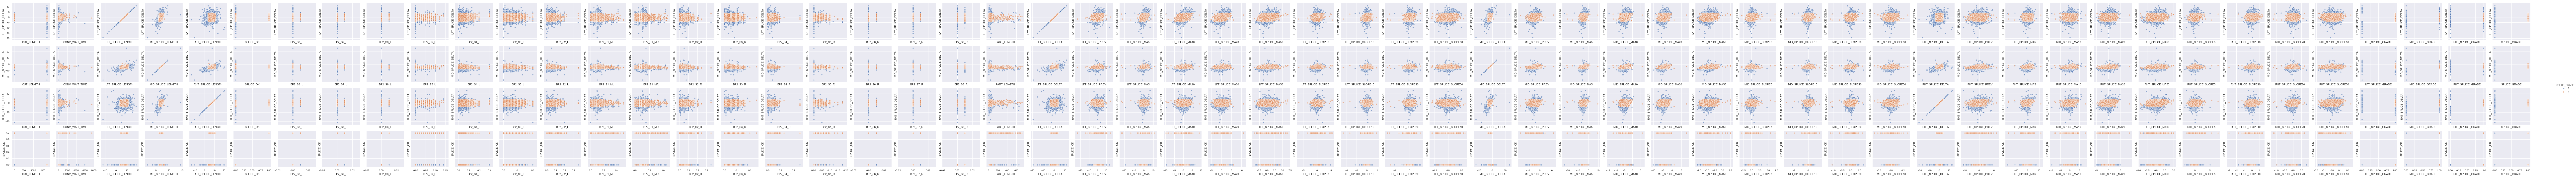

In [51]:
# using df_sample dataset (10000 rows only)

ycols = ['LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA','RHT_SPLICE_DELTA', 'SPLICE_OK']
xcols = ['CUT_LENGTH', 'CONV_WAIT_TIME', 'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
         'SPLICE_OK', 'BP2_S8_L', 'BP2_S7_L', 'BP2_S6_L', 'BP2_S5_L', 'BP2_S4_L', 'BP2_S3_L', 'BP2_S2_L',
         'BP2_S1_ML', 'BP2_S1_MR', 'BP2_S2_R', 'BP2_S3_R', 'BP2_S4_R', 'BP2_S5_R', 'BP2_S6_R', 'BP2_S7_R', 
         'BP2_S8_R', 'PART_LENGTH', 'LFT_SPLICE_DELTA', 'LFT_SPLICE_PREV', 'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 
         'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20',
         'LFT_SPLICE_SLOPE50', 'MID_SPLICE_DELTA', 'MID_SPLICE_PREV', 'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 
         'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20',
         'MID_SPLICE_SLOPE50', 'RHT_SPLICE_DELTA', 'RHT_SPLICE_PREV', 'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10',
         'RHT_SPLICE_MA20', 'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10', 'RHT_SPLICE_SLOPE20',
         'RHT_SPLICE_SLOPE50', 'LFT_SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', 'SPLICE_GRADE']

g = sns.PairGrid(df_sample, x_vars=xcols, y_vars=ycols, hue='SPLICE_GRADE', hue_order=[0, 1]) 
# palette="Oranges" or "Blues"
# hue_kws={"marker": ["v", "o", "^"]
g = g.map(plt.scatter, s=30, alpha= 0.6, edgecolor='w')
# plot_kws = {'alpha': 0.6, 's': 40, 'edgecolor': 'w'}

xlabels,ylabels = [],[]

# ax.legend()
g = g.add_legend()

# ax.grid(True)

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

In [52]:
# %matplotlib inline  
# %matplotlib notebook

# # Splice Delta x Cut Length x Wait Time, or Splice Delta x Moving Average5 x Moving Average10
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(111, projection='3d')

# xs = df['LFT_SPLICE_DELTA']
# ys = df['CUT_LENGTH']
# zs = df['CONV_WAIT_TIME']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# ax.set_xlabel('Left Splice Delta')
# ax.set_ylabel('Cut Length')
# ax.set_zlabel('Conveyer Wait Time')

# ax.mouse_init()

# plt.show()

In [53]:
# def core(df, α=.05):
#     mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
#     return df[mask]

In [54]:
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# (df_sample.select_dtypes(include=[np.number])
#    .pipe(core)
#    .pipe(sns.PairGrid)
#    .map_upper(plt.scatter, marker='.', alpha=.25)
#    .map_diag(sns.kdeplot)
#    .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
# );

In [55]:
df.to_csv('VMI_Data_BP2_V02_AK6_090118_032619_mod02.csv', header=True, index=False)

In [56]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [57]:
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame/42593334

In [58]:
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [59]:
# https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame/42593334

In [60]:
# https://jovianlin.io/data-visualization-seaborn-part-3/

In [61]:
# https://stackoverflow.com/questions/32889590/seaborn-pairgrid-using-kdeplot-with-2-hues

In [62]:
# https://github.com/mwaskom/seaborn/issues/933